## IMPORTANT
### This notebook will not display correctly unless you click the theta-like symbol directly to the right
#### (a circle with a line bisecting it horizontally).
#### This notebook contains plotly visualizations, which github doesn't support.
#### Don't worry, it's just a click away, and it's worth it -- mouse hover over the visuals to see the interactivity.

### Visualizations.

In [1]:
"""Read in 23 files, one for each year 1992-2014. Each year's file contains one line for every 
substance abuse treatment admissions case in the United States that year.
For each file, select the cases for alcoholism admissions in Massachusetts. Select variables of interest. Combine files"""

import pandas as pd
pd.set_option('mode.chained_assignment', None)

years = range(1992, 2015)
pieces = []

for year in years: 
    path = 'C:/python/A%d.tsv' % year
    frame_unf = pd.read_csv(path, sep='\t', usecols=['EDUC', 'EMPLOY', 'ETHNIC', 'GENDER', 'MARSTAT', 'RACE', 'STFIPS', 'SUB1', 'VET', 'YEAR'], low_memory=False)
    frame = frame_unf[(frame_unf.SUB1 == 2) & (frame_unf.STFIPS == 25)] 
    pieces.append(frame)

all_case_data = pd.concat(pieces, ignore_index = True)
 

In [2]:
all_case_data.head()

,YEAR,GENDER,RACE,ETHNIC,MARSTAT,EDUC,EMPLOY,VET,STFIPS,SUB1
0,1992,2,5,-9,1,2,4,2,25,2
1,1992,1,4,1,1,2,1,2,25,2
2,1992,1,5,5,1,3,4,2,25,2
3,1992,1,5,5,2,4,4,1,25,2
4,1992,1,5,1,4,1,3,2,25,2


In [3]:
# save as a pickle

all_case_data.to_pickle ("C:/Users/rmbrm/Documents/DS ED/2018/Spring/Cap1/Git/all_case_data", compression='infer', protocol=4)

In [4]:
"""Count number of cases in different demographic subgroups for each year and build a dataframe
summarizing this information"""

years = range(1992, 2015)
pieces = []

for year in years: 
    year_string = str(year)
    dfcx = pd.DataFrame(all_case_data.groupby('YEAR').get_group(year).reset_index()).drop('index', axis = 1)
    df = dfcx['VET'].value_counts().to_frame()
    df.index.names = ['year_string']
    df = df.transpose()
    df = df.rename({'VET': 'year_string'}, axis='index')
    vet = df.rename(index=str, columns={2: "civilian", 1: "veteran", -9: "vet_miss"})
    df = dfcx['MARSTAT'].value_counts().to_frame()
    df.index.names = ['year_string']
    df = df.transpose()
    df = df.rename({'MARSTAT': 'year_string'}, axis='index')
    mar_stat = df.rename(index=str, columns={2: "married", 1: "nvr_mrrd", 3: "separated", 4: "divcd_wdw", -9: "marr_miss"})
    df = dfcx['GENDER'].value_counts().to_frame()
    df.index.names = ['year_string']
    df = df.transpose()
    df = df.rename({'GENDER': 'year_string'}, axis='index')
    gender = df.rename(index=str, columns={2: "female", 1: "male", -9: "gender_miss"})
    df = dfcx['EMPLOY'].value_counts().to_frame()
    df.index.names = ['year_string']
    df = df.transpose()
    df = df.rename({'EMPLOY': 'year_string'}, axis='index')
    employment = df.rename(index=str, columns={2: "part_time", 1: "full_time", 3: "unemployed", 4: "not_in_wrkfrc", -9: "Empl_miss"})
    df = dfcx['EDUC'].value_counts().to_frame()
    df.index.names = ['year_string']
    df = df.transpose()
    df = df.rename({'EDUC': 'year_string'}, axis='index')
    educ = df.rename(index=str, columns={2: "HS_not_grad", 1: "No_HS", 3: "HS_grad", 5: "BS_or_more", 4: "Post_HS", -9: "Educ_miss"})
    df = dfcx['RACE'].value_counts().to_frame()
    df.index.names = ['year_string']
    df = df.transpose()
    df = df.rename({'RACE': 'year_string'}, axis='index')
    df = df.rename(index=str, columns={4: "black", 5: "white"})
    race = df.filter(['black', 'white'])
    df = dfcx['YEAR'].value_counts().to_frame()
    df.index.names = ['year_string']
    df = df.transpose()
    df = df.rename({'YEAR': 'year_string'}, axis='index')
    total = df.rename(index=str, columns={year: "Total_Admits"})
    demo = pd.concat([vet, mar_stat, gender, employment, educ, race, total], axis=1)
    pieces.append(demo)

# combine the dataframes of each year's demographic variable counts into a single dataframe

all_demo_data = pd.concat(pieces, ignore_index = True)

    



In [5]:
# add a variable for year

when = pd.Series([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], index =[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])


In [6]:
all_demo_data ['YEAR'] = when

In [7]:
all_demo_data.head()

,BS_or_more,Educ_miss,Empl_miss,HS_grad,HS_not_grad,No_HS,Post_HS,Total_Admits,black,civilian,...,married,not_in_wrkfrc,nvr_mrrd,part_time,separated,unemployed,vet_miss,veteran,white,YEAR
0,1917,3,1.0,13671,7104.0,2852,3979,29526,3636,28147,...,4699,17668,15265,2075,2525,4152,10,1369.0,23985,1992
1,2091,4,1.0,14632,7282.0,3153,4379,31541,3707,29969,...,4979,19690,16301,2270,2669,3602,8,1564.0,25577,1993
2,2140,9,1.0,15203,7264.0,3123,4471,32210,3736,30890,...,4978,20270,16775,2214,2710,2872,7,1313.0,25966,1994
3,2288,5,1.0,15791,7587.0,3120,4620,33411,4526,32083,...,4967,21825,17966,2253,2700,2673,2,1326.0,25781,1995
4,2398,1,NaN,16256,7935.0,3013,4956,34559,4552,33129,...,4942,22508,19072,2361,2481,2722,3,1427.0,26976,1996


In [8]:
all_demo_data.tail()

,BS_or_more,Educ_miss,Empl_miss,HS_grad,HS_not_grad,No_HS,Post_HS,Total_Admits,black,civilian,...,married,not_in_wrkfrc,nvr_mrrd,part_time,separated,unemployed,vet_miss,veteran,white,YEAR
18,3821,2054,1293.0,12693,NaN,5502,7131,31201,3122,30875,...,5011,13584,17200,2155,1794,7383,2,324.0,24641,2010
19,3820,1424,856.0,12407,NaN,5235,6829,29715,2870,29468,...,4706,13232,16651,1935,1666,6880,1,246.0,23325,2011
20,4121,1169,709.0,12161,NaN,5036,7526,30013,2653,29681,...,4951,12931,16830,2212,1705,6824,3,329.0,23884,2012
21,3956,1591,654.0,11390,NaN,4728,7176,28841,2555,28441,...,4808,12670,16264,2257,1498,5734,3,397.0,23057,2013
22,3992,1605,527.0,10520,NaN,4437,7065,27619,2485,27087,...,4783,12052,15450,2000,1457,5578,6,526.0,21926,2014


In [9]:
all_demo_data.dtypes

BS_or_more         int64
Educ_miss          int64
Empl_miss        float64
HS_grad            int64
HS_not_grad      float64
No_HS              int64
Post_HS            int64
Total_Admits       int64
black              int64
civilian           int64
divcd_wdw          int64
female             int64
full_time          int64
gender_miss      float64
male               int64
marr_miss        float64
married            int64
not_in_wrkfrc      int64
nvr_mrrd           int64
part_time          int64
separated          int64
unemployed         int64
vet_miss           int64
veteran          float64
white              int64
YEAR               int64
dtype: object

In [10]:
# save as a pickle

all_demo_data.to_pickle ("C:/Users/rmbrm/Documents/DS ED/2018/Spring/Cap1/Git/all_demo_data", compression='infer', protocol=4)

In [11]:
# Read in and edit weather data

df = pd.read_csv("C:/python/bluehill2.txt", sep='\t', header=0)


In [12]:
df.head()

,season,StartDate,EndDate,Length,TempScore,TempMsng,SnowScore,SnowMsng,AWSSI,YEAR
0,1951,11/21/1950,3/22/1951,122,242,(0/0),135,(0/0),377,1951
1,1952,11/2/1951,3/25/1952,145,293,(0/1),359,(0/0),652,1952
2,1953,11/9/1952,4/14/1953,157,227,(1/0),200,(0/0),427,1953
3,1954,12/1/1953,4/1/1954,122,270,(0/0),149,(4/0),419,1954
4,1955,11/26/1954,4/4/1955,130,307,(0/0),163,(1/0),470,1955


In [13]:
# Edit weather data

dfb = df[:-2]
dfc = dfb[-23:]
dfc = dfc.reset_index(drop=True)


In [14]:
# add a variable for the solstice, to be used for feature engineering

when = pd.Series(['12/21/1991', '12/21/1992', '12/21/1993', '12/21/1994', '12/21/1995', '12/21/1996', '12/21/1997', '12/21/1998', '12/21/1999', '12/21/2000', '12/21/2001', '12/21/2002', '12/21/2003', '12/21/2004', '12/21/2005', '12/21/2006', '12/21/2007', '12/21/2008', '12/21/2009', '12/21/2010', '12/21/2011', '12/21/2012', '12/21/2013'], index =[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])

In [15]:
dfc ['Solstice'] = when

In [16]:
dfc.head()

,season,StartDate,EndDate,Length,TempScore,TempMsng,SnowScore,SnowMsng,AWSSI,YEAR,Solstice
0,1992,11/11/1991,4/17/1992,159,335,(0/0),105,(0/0),440,1992,12/21/1991
1,1993,11/15/1992,4/27/1993,164,364,(0/0),424,(0/0),788,1993,12/21/1992
2,1994,11/24/1993,3/30/1994,127,426,(0/0),626,(0/0),1052,1994,12/21/1993
3,1995,11/23/1994,4/5/1995,134,279,(0/0),90,(0/0),369,1995,12/21/1994
4,1996,11/13/1995,4/13/1996,153,400,(0/0),690,(0/0),1090,1996,12/21/1995


In [17]:
# Engineer features indicating how early a winter starts and how late it ends as days away from the solstice

import numpy as np
import datetime as dt
from datetime import datetime
from datetime import timedelta 

dfc['StartDate'] = pd.to_datetime(dfc['StartDate'])
dfc['Solstice'] = pd.to_datetime(dfc['Solstice'])
dfc['EndDate'] = pd.to_datetime(dfc['EndDate'])
dfc.dtypes

season                int64
StartDate    datetime64[ns]
EndDate      datetime64[ns]
Length                int64
TempScore             int64
TempMsng             object
SnowScore             int64
SnowMsng             object
AWSSI                 int64
YEAR                  int64
Solstice     datetime64[ns]
dtype: object

In [18]:
dfc['end'] = dfc['Solstice'] - dfc['EndDate'] 
dfc['start'] = dfc['Solstice'] - dfc['StartDate'] 
dfc.dtypes

season                 int64
StartDate     datetime64[ns]
EndDate       datetime64[ns]
Length                 int64
TempScore              int64
TempMsng              object
SnowScore              int64
SnowMsng              object
AWSSI                  int64
YEAR                   int64
Solstice      datetime64[ns]
end          timedelta64[ns]
start        timedelta64[ns]
dtype: object

In [19]:
dfc['start_scale'] = (dfc['start'] / np.timedelta64(1, 'D')).astype(int)
dfc['end_scale'] = (dfc['end'] / np.timedelta64(1, 'D')).astype(int)
dfc['end_scale'] = dfc['end_scale'].abs()
df = dfc.drop(['Solstice', 'start', 'end'], axis=1)

In [20]:
# Edit and resequence dataframe
df = df [['YEAR', 'season', 'StartDate', 'EndDate', 'Length', 'TempScore', 'TempMsng', 'SnowScore', 'SnowMsng', 'AWSSI', 'start_scale', 'end_scale']]
dfb = df.set_index(['YEAR'])
dfb

,season,StartDate,EndDate,Length,TempScore,TempMsng,SnowScore,SnowMsng,AWSSI,start_scale,end_scale
YEAR,,,,,,,,,,,
1992,1992,1991-11-11,1992-04-17,159,335,(0/0),105,(0/0),440,40,118
1993,1993,1992-11-15,1993-04-27,164,364,(0/0),424,(0/0),788,36,127
1994,1994,1993-11-24,1994-03-30,127,426,(0/0),626,(0/0),1052,27,99
1995,1995,1994-11-23,1995-04-05,134,279,(0/0),90,(0/0),369,28,105
1996,1996,1995-11-13,1996-04-13,153,400,(0/0),690,(0/0),1090,38,114
1997,1997,1996-11-15,1997-04-09,146,282,(0/0),219,(0/0),501,36,109
1998,1998,1997-11-14,1998-04-10,148,202,(0/0),245,(1/0),447,37,110
1999,1999,1998-12-01,1999-03-18,108,245,(0/0),198,(0/0),443,20,87
2000,2000,1999-12-01,2000-04-27,149,300,(0/0),231,(0/0),531,20,128


In [21]:
# save as a pickle

dfb.to_pickle ("C:/Users/rmbrm/Documents/DS ED/2018/Spring/Cap1/Git/weather_data", compression='infer', protocol=4)

In [22]:
# Create a dataframe with all features and targets and remove extra index

all_demo_data = all_demo_data.reset_index(drop=True)
dfb = dfb.reset_index(drop=True)
all_data = pd.concat([dfb, all_demo_data], axis=1)

In [23]:
all_data.head()

,season,StartDate,EndDate,Length,TempScore,TempMsng,SnowScore,SnowMsng,AWSSI,start_scale,...,married,not_in_wrkfrc,nvr_mrrd,part_time,separated,unemployed,vet_miss,veteran,white,YEAR
0,1992,1991-11-11,1992-04-17,159,335,(0/0),105,(0/0),440,40,...,4699,17668,15265,2075,2525,4152,10,1369.0,23985,1992
1,1993,1992-11-15,1993-04-27,164,364,(0/0),424,(0/0),788,36,...,4979,19690,16301,2270,2669,3602,8,1564.0,25577,1993
2,1994,1993-11-24,1994-03-30,127,426,(0/0),626,(0/0),1052,27,...,4978,20270,16775,2214,2710,2872,7,1313.0,25966,1994
3,1995,1994-11-23,1995-04-05,134,279,(0/0),90,(0/0),369,28,...,4967,21825,17966,2253,2700,2673,2,1326.0,25781,1995
4,1996,1995-11-13,1996-04-13,153,400,(0/0),690,(0/0),1090,38,...,4942,22508,19072,2361,2481,2722,3,1427.0,26976,1996


In [24]:
all_data.dtypes

season                    int64
StartDate        datetime64[ns]
EndDate          datetime64[ns]
Length                    int64
TempScore                 int64
TempMsng                 object
SnowScore                 int64
SnowMsng                 object
AWSSI                     int64
start_scale               int32
end_scale                 int32
BS_or_more                int64
Educ_miss                 int64
Empl_miss               float64
HS_grad                   int64
HS_not_grad             float64
No_HS                     int64
Post_HS                   int64
Total_Admits              int64
black                     int64
civilian                  int64
divcd_wdw                 int64
female                    int64
full_time                 int64
gender_miss             float64
male                      int64
marr_miss               float64
married                   int64
not_in_wrkfrc             int64
nvr_mrrd                  int64
part_time                 int64
separate

In [25]:
# how much missing data

all_data.isnull().sum().sum()

38

In [26]:
# where are the missing data

all_data.isnull().sum()

season            0
StartDate         0
EndDate           0
Length            0
TempScore         0
TempMsng          0
SnowScore         0
SnowMsng          0
AWSSI             0
start_scale       0
end_scale         0
BS_or_more        0
Educ_miss         0
Empl_miss         6
HS_grad           0
HS_not_grad       9
No_HS             0
Post_HS           0
Total_Admits      0
black             0
civilian          0
divcd_wdw         0
female            0
full_time         0
gender_miss      13
male              0
marr_miss         4
married           0
not_in_wrkfrc     0
nvr_mrrd          0
part_time         0
separated         0
unemployed        0
vet_miss          0
veteran           6
white             0
YEAR              0
dtype: int64

In [27]:
# for missing data that is showing that actual case data 
# is NOT missing, and for columns with low values
# replace all missing data with zero
#recode NaN as zero

dfb = all_data.fillna(0)

In [28]:
# check recode

dfb.isnull().sum().sum()

0

In [29]:
#save as a pickle

dfb.to_pickle("C:/Users/rmbrm/Documents/DS ED/2018/Spring/Cap1/Git/all_data", compression='infer', protocol=4)

#### Features for the data below are six winter weather severity measures.
#### Targets are admissions for treatment of alcoholism, an overall tally and demographic breakdowns

### The boxplots below are the start of a color theme I created and used going forward with a few exceptions.

In [2]:
# Read in and edit weather data

import pandas as pd
import numpy as np
dfb = pd.read_pickle("C:/Users/rmbrm/Documents/DS ED/2018/Spring/Cap1/Git/all_data", compression='infer')


In [3]:
# box plots

import plotly
plotly.tools.set_credentials_file(username="Ross.Brown.Ph.D.", api_key='yPNZCAkYOyi7wAKtZrSM')
import plotly.plotly as py
import plotly.offline as pyo
# from plotly.graph_objs import *
import plotly.plotly as py
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly import tools
from plotly.graph_objs import Bar, Data, Figure, Layout, Marker, Scatter
init_notebook_mode(connected=True)
import cufflinks as cf
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

In [4]:
# Boxplot of weather index and components

fig1 = dfb.iplot(columns=['AWSSI', 'TempScore', 'SnowScore'], colors=['#08519c', '#6baed6', '#08519c', '#85929e'], kind='box', boxpoints='outliers', title='Range and Outliers of Winter Severity Index and Components',  yTitle='Index', gridcolor='#FFFFFF', asFigure=True)
fig1['layout'].update(titlefont=dict(
            family='Verdana',
            size=15,
            color='#7f7f7f'
            ),
            paper_bgcolor='#FFFFFF', plot_bgcolor='#FFFFFF')
pyo.iplot(fig1)

In [5]:
# Boxplot of winter length and two winter duration metrics

fig1 = dfb.iplot(columns=['Length', 'start_scale', 'end_scale'], colors=['#85929e', '#6baed6', '#08519c'], kind='box', boxpoints='outliers', title='Range and Outliers of Winter Length, Start and End',  yTitle='Days', gridcolor='#FFFFFF', asFigure=True)
fig1['layout'].update(titlefont=dict(
            family='Verdana',
            size=15,
            color='#7f7f7f'
            ),
            paper_bgcolor='#FFFFFF', plot_bgcolor='#FFFFFF')
pyo.iplot(fig1)

In [6]:
# Create a dataframe with only and all the alcohol admissions demographic variables and organized logically to
# plot distributions and outliers in a single chart

df_demos = dfb [['Total_Admits', 'male', 'female', 'white', 'black', 'nvr_mrrd', 'married', 'separated', 'divcd_wdw', 'No_HS', 'HS_not_grad', 'HS_grad', 'Post_HS', 'BS_or_more', 'full_time', 'part_time', 'unemployed', 'not_in_wrkfrc', 'civilian', 'veteran']]
df_demos.head()



,Total_Admits,male,female,white,black,nvr_mrrd,married,separated,divcd_wdw,No_HS,HS_not_grad,HS_grad,Post_HS,BS_or_more,full_time,part_time,unemployed,not_in_wrkfrc,civilian,veteran
0,29526,22460,7066,23985,3636,15265,4699,2525,7033,2852,7104.0,13671,3979,1917,5630,2075,4152,17668,28147,1369.0
1,31541,24161,7380,25577,3707,16301,4979,2669,7587,3153,7282.0,14632,4379,2091,5978,2270,3602,19690,29969,1564.0
2,32210,24770,7440,25966,3736,16775,4978,2710,7742,3123,7264.0,15203,4471,2140,6853,2214,2872,20270,30890,1313.0
3,33411,25574,7837,25781,4526,17966,4967,2700,7776,3120,7587.0,15791,4620,2288,6659,2253,2673,21825,32083,1326.0
4,34559,26205,8354,26976,4552,19072,4942,2481,8062,3013,7935.0,16256,4956,2398,6968,2361,2722,22508,33129,1427.0


In [7]:
# Create box plots of demographic variables in a logical sequence using default color schemes

fig1 = df_demos.iplot(kind='box', boxpoints='outliers', title='Range and Outliers of Admissions for Alcoholism Treatment by Demographic Variables',  yTitle='Number of Admissions', gridcolor='#FFFFFF', asFigure=True)
fig1['layout'].update(titlefont=dict(
            family='Verdana',
            size=15,
            color='#7f7f7f'
            ),
            paper_bgcolor='#FFFFFF', plot_bgcolor='#FFFFFF')
pyo.iplot(fig1)

Upon reviewing the ns for some of these subgroups, combining them into larger, 
logical groups that retain important characteristics may make for more robust analysis and predictions. 
The new groups are: No high school degree, high school degree, college; employed and not working;
Nevermaried and married at some time


In [8]:
# combine variables

dfb = df_demos

dfb['No_HS_degree'] = dfb['HS_not_grad'] + dfb['No_HS']
dfb['college'] = dfb['Post_HS'] + dfb['BS_or_more']
dfb['working'] = dfb ['full_time'] + dfb ['part_time']
dfb['no_work'] = dfb ['unemployed'] + dfb ['not_in_wrkfrc']
dfb['some_marriage'] = dfb ['separated'] + dfb ['married'] + dfb ['divcd_wdw']
dfb.head()

,Total_Admits,male,female,white,black,nvr_mrrd,married,separated,divcd_wdw,No_HS,...,part_time,unemployed,not_in_wrkfrc,civilian,veteran,No_HS_degree,college,working,no_work,some_marriage
0,29526,22460,7066,23985,3636,15265,4699,2525,7033,2852,...,2075,4152,17668,28147,1369.0,9956.0,5896,7705,21820,14257
1,31541,24161,7380,25577,3707,16301,4979,2669,7587,3153,...,2270,3602,19690,29969,1564.0,10435.0,6470,8248,23292,15235
2,32210,24770,7440,25966,3736,16775,4978,2710,7742,3123,...,2214,2872,20270,30890,1313.0,10387.0,6611,9067,23142,15430
3,33411,25574,7837,25781,4526,17966,4967,2700,7776,3120,...,2253,2673,21825,32083,1326.0,10707.0,6908,8912,24498,15443
4,34559,26205,8354,26976,4552,19072,4942,2481,8062,3013,...,2361,2722,22508,33129,1427.0,10948.0,7354,9329,25230,15485


In [9]:
# Remove old variables and resequence

dfb = dfb [['Total_Admits', 'male', 'female', 'white', 'black', 'No_HS_degree', 'HS_grad', 'college', 'nvr_mrrd', 'some_marriage', 'working', 'no_work']]
dfb.head()

,Total_Admits,male,female,white,black,No_HS_degree,HS_grad,college,nvr_mrrd,some_marriage,working,no_work
0,29526,22460,7066,23985,3636,9956.0,13671,5896,15265,14257,7705,21820
1,31541,24161,7380,25577,3707,10435.0,14632,6470,16301,15235,8248,23292
2,32210,24770,7440,25966,3736,10387.0,15203,6611,16775,15430,9067,23142
3,33411,25574,7837,25781,4526,10707.0,15791,6908,17966,15443,8912,24498
4,34559,26205,8354,26976,4552,10948.0,16256,7354,19072,15485,9329,25230


In [10]:
# Create box plots of main target and target subgroups

fig1 = dfb.iplot(kind='box', boxpoints='outliers', title='Range and Outliers of Admissions for Alcoholism Treatment by Demographic Variables',  yTitle='Number of Admissions', gridcolor='#FFFFFF', asFigure=True)
fig1['layout'].update(titlefont=dict(
            family='Verdana',
            size=15,
            color='#7f7f7f'
            ),
            paper_bgcolor='#FFFFFF', plot_bgcolor='#FFFFFF')
pyo.iplot(fig1)

### Histograms, scatterplots, and bar charts with secondary axis

In [15]:
import plotly
plotly.tools.set_credentials_file(username="Ross.Brown.Ph.D.", api_key='yPNZCAkYOyi7wAKtZrSM')

In [16]:
plotly.tools.set_credentials_file(username="Ross.Brown.Ph.D.", api_key='yPNZCAkYOyi7wAKtZrSM')

In [17]:
import pandas as pd
from pandas import DataFrame

In [18]:
df = pd.read_pickle("C:/Users/rmbrm/Documents/DS ED/2018/Spring/Cap1/Git/all_data", compression='infer')

In [19]:
df.head()

,season,StartDate,EndDate,Length,TempScore,TempMsng,SnowScore,SnowMsng,AWSSI,start_scale,...,married,not_in_wrkfrc,nvr_mrrd,part_time,separated,unemployed,vet_miss,veteran,white,YEAR
0,1992,1991-11-11,1992-04-17,159,335,(0/0),105,(0/0),440,40,...,4699,17668,15265,2075,2525,4152,10,1369.0,23985,1992
1,1993,1992-11-15,1993-04-27,164,364,(0/0),424,(0/0),788,36,...,4979,19690,16301,2270,2669,3602,8,1564.0,25577,1993
2,1994,1993-11-24,1994-03-30,127,426,(0/0),626,(0/0),1052,27,...,4978,20270,16775,2214,2710,2872,7,1313.0,25966,1994
3,1995,1994-11-23,1995-04-05,134,279,(0/0),90,(0/0),369,28,...,4967,21825,17966,2253,2700,2673,2,1326.0,25781,1995
4,1996,1995-11-13,1996-04-13,153,400,(0/0),690,(0/0),1090,38,...,4942,22508,19072,2361,2481,2722,3,1427.0,26976,1996


In [20]:
df = df.set_index(['YEAR'], drop = False)

In [21]:
df.head()

,season,StartDate,EndDate,Length,TempScore,TempMsng,SnowScore,SnowMsng,AWSSI,start_scale,...,married,not_in_wrkfrc,nvr_mrrd,part_time,separated,unemployed,vet_miss,veteran,white,YEAR
YEAR,,,,,,,,,,,,,,,,,,,,,
1992,1992,1991-11-11,1992-04-17,159,335,(0/0),105,(0/0),440,40,...,4699,17668,15265,2075,2525,4152,10,1369.0,23985,1992
1993,1993,1992-11-15,1993-04-27,164,364,(0/0),424,(0/0),788,36,...,4979,19690,16301,2270,2669,3602,8,1564.0,25577,1993
1994,1994,1993-11-24,1994-03-30,127,426,(0/0),626,(0/0),1052,27,...,4978,20270,16775,2214,2710,2872,7,1313.0,25966,1994
1995,1995,1994-11-23,1995-04-05,134,279,(0/0),90,(0/0),369,28,...,4967,21825,17966,2253,2700,2673,2,1326.0,25781,1995
1996,1996,1995-11-13,1996-04-13,153,400,(0/0),690,(0/0),1090,38,...,4942,22508,19072,2361,2481,2722,3,1427.0,26976,1996


In [22]:

import plotly.offline as pyo

from plotly.graph_objs import *

import plotly.plotly as py

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [23]:
import plotly.graph_objs as go
import numpy as np

from plotly import tools
from plotly.graph_objs import Bar, Data, Figure, Layout, Marker, Scatter

init_notebook_mode(connected=True)

import cufflinks as cf


In [24]:
df_hist = df[['Total_Admits']]
df_hist.head()

,Total_Admits
YEAR,
1992,29526
1993,31541
1994,32210
1995,33411
1996,34559


In [25]:
# Make a histogram of main target


fig1 = df_hist.iplot(kind='histogram', color='#08519c', title='Alcoholism Admissions per Year', xTitle='Number of Admissions', yTitle='Number of Years', asFigure=True)
pyo.iplot(fig1)

In [26]:
# Plot three winter duration metrics against total admissions for alcoholism

df['Total_Admits2'] = df['Total_Admits']

df['Total_Admits3'] = df['Total_Admits']


fig = {
    'data': [
                {
                'x': df['Total_Admits'],
            'y': df['Length'],
            'mode': 'markers',
            'name': 'Length'},
        {
            'x': df['Total_Admits2'],
            'y': df['start_scale'],
            'mode': 'markers',
            'name': 'Start of Winter - Greater is Earlier'},
        
        {
            'x': df['Total_Admits3'],
            'y': df['end_scale'],
            'mode': 'markers',
            'name': 'End of Winter - Greater is Later'}
    ],
    'layout': {
        'xaxis': {'title': 'Number of Admissions'},
        'yaxis': {'title': "Days"}
    }
}
pyo.iplot(fig)        


In [27]:
# Create scatter plot matrices of feature subsets (Index and Duration) plotted against main target, admissions for alcoholism

# Index-related features

dfindex = df [['Total_Admits', 'AWSSI', 'TempScore', 'SnowScore']]
dfindex = dfindex.set_index(['Total_Admits'])
dfindex.head()


,AWSSI,TempScore,SnowScore
Total_Admits,,,
29526,440,335,105
31541,788,364,424
32210,1052,426,626
33411,369,279,90
34559,1090,400,690


In [28]:
# AWSSI and components scatter plot

fig1 = dfindex.iplot(colors=['#08519c', '#3182bd', '#85929e'], kind='scatter', mode='markers', subplots=True, subplot_titles=True, shared_xaxes=True, title='Features: Winter Index and Temperature, Snow Components. Target: Total Alcoholism Admissions.',  xTitle='Number of Admissions', yTitle='Index', dimensions=(1116, 800), asFigure=True)
pyo.iplot(fig1)

In [29]:
# Make several scatter plots of features and main target, and components of features and components of targets

fig = df.iplot(kind='scatter', mode='markers', color='#3498db', x='Total_Admits', y='AWSSI', title='Winter Severity Index and Alcoholism Admissions',  xTitle='Number of Admissions', yTitle='Winter Severity Index', gridcolor='#666666', asFigure=True)
fig['layout'].update(titlefont=dict(
            family='Verdana',
            size=15,
            color='#7f7f7f'
            ),
            paper_bgcolor='#FFFFFF', plot_bgcolor='#FFFFFF')
pyo.iplot(fig)

In [30]:
# Demographic subgroups: Whites

fig = df.iplot(kind='scatter', mode='markers', color='#3498db', x='white', y='AWSSI', title='Winter Severity Index and Alcoholism Admissions - Whites',  xTitle='Number of Admissions', yTitle='Winter Severity Index', gridcolor='#666666', asFigure=True)
fig['layout'].update(titlefont=dict(
            family='Verdana',
            size=15,
            color='#7f7f7f'
            ),
            paper_bgcolor='#FFFFFF', plot_bgcolor='#FFFFFF')
pyo.iplot(fig)


In [31]:
# Make bar chart of main target (Total admissions) overlayed with line charts of main Index related features

df = df.set_index(['YEAR'], drop = False)
df.head()

,season,StartDate,EndDate,Length,TempScore,TempMsng,SnowScore,SnowMsng,AWSSI,start_scale,...,nvr_mrrd,part_time,separated,unemployed,vet_miss,veteran,white,YEAR,Total_Admits2,Total_Admits3
YEAR,,,,,,,,,,,,,,,,,,,,,
1992,1992,1991-11-11,1992-04-17,159,335,(0/0),105,(0/0),440,40,...,15265,2075,2525,4152,10,1369.0,23985,1992,29526,29526
1993,1993,1992-11-15,1993-04-27,164,364,(0/0),424,(0/0),788,36,...,16301,2270,2669,3602,8,1564.0,25577,1993,31541,31541
1994,1994,1993-11-24,1994-03-30,127,426,(0/0),626,(0/0),1052,27,...,16775,2214,2710,2872,7,1313.0,25966,1994,32210,32210
1995,1995,1994-11-23,1995-04-05,134,279,(0/0),90,(0/0),369,28,...,17966,2253,2700,2673,2,1326.0,25781,1995,33411,33411
1996,1996,1995-11-13,1996-04-13,153,400,(0/0),690,(0/0),1090,38,...,19072,2361,2481,2722,3,1427.0,26976,1996,34559,34559


In [32]:
import cufflinks as cf
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

In [33]:

fig1 = df.iplot(columns=['Total_Admits'], colors=['#08519c'], kind='bar', gridcolor='#FFFFFF', asFigure=True)
fig2 = df.iplot(columns=['AWSSI', 'TempScore', 'SnowScore'], colors=['#34495e', '#85929e', '#ccd1d1'], width=[4, 3, 3], title='Features: Winter Severity Index & Components. Target: Total Alcoholism Admissions',  xTitle='Year', yTitle='Admissions', secondary_y=['AWSSI','TempScore', 'SnowScore'], gridcolor='#FFFFFF', asFigure=True)
fig2['data'].extend(fig1['data'])
fig2['layout'].update(titlefont=dict(
            family='Verdana',
            size=15,
            color='#7f7f7f'
            ),
            paper_bgcolor='#FFFFFF', plot_bgcolor='#FFFFFF')
pyo.iplot(fig2)

In [34]:
# Make stacked bar charts of main demographic subgroups of target, overlaid with a line chart of feature and components
# Gender

fig1 = df.iplot(columns=['male', 'female'], colors=['#08519c', '#3182bd'], kind='bar', gridcolor='#FFFFFF', asFigure=True)
fig2 = df.iplot(columns=['Length', 'TempScore', 'SnowScore', 'AWSSI'], colors=['#fdfefe', '#85929e', '#ccd1d1', '#34495e'], width=[3, 3, 3, 4], title='Winter Severity Index and Alcoholism Admissions by Gender',  xTitle='Year', yTitle='Admissions', secondary_y=['Length','TempScore', 'SnowScore', 'AWSSI'], gridcolor='#FFFFFF', asFigure=True)
fig2['data'].extend(fig1['data'])
fig2['layout'].update(barmode='stack', titlefont=dict(
            family='Verdana',
            size=15,
            color='#7f7f7f'
            ),
            paper_bgcolor='#FFFFFF', plot_bgcolor='#FFFFFF')
pyo.iplot(fig2)

In [35]:
# Education

fig1 = df.iplot(columns=['BS_or_more', 'Post_HS', 'HS_grad', 'HS_not_grad','No_HS'], colors=['#08519c', '#3182bd', '#6baed6', '#9ecae1', '#c6dbef'], kind='bar', gridcolor='#FFFFFF', asFigure=True)
fig2 = df.iplot(columns=['Length', 'TempScore', 'SnowScore', 'AWSSI'], colors=['#fdfefe', '#85929e', '#ccd1d1', '#34495e'], width=[3, 3, 3, 4], title='Winter Severity Index and Alcoholism Admissions by Education',  xTitle='Year', yTitle='Admissions', secondary_y=['Length','TempScore', 'SnowScore', 'AWSSI'], gridcolor='#FFFFFF', asFigure=True)
fig2['data'].extend(fig1['data'])
fig2['layout'].update(barmode='stack', titlefont=dict(
            family='Verdana',
            size=15,
            color='#7f7f7f'
            ),
            paper_bgcolor='#FFFFFF', plot_bgcolor='#FFFFFF')
pyo.iplot(fig2)

### Correlation heatmaps

In [44]:
dfb = pd.read_pickle("C:/Users/rmbrm/Documents/DS ED/2018/Spring/Cap1/Git/all_data", compression='infer')

In [37]:
correlations = pd.read_pickle("C:/Users/rmbrm/Documents/DS ED/2018/Spring/Cap1/Git/correlations", compression='infer')
c_v_corrs = pd.read_pickle("C:/Users/rmbrm/Documents/DS ED/2018/Spring/Cap1/Git/c_v_corrs", compression='infer')

In [38]:
# rehape two correlation matrices for heatmaps

dfl = correlations.drop(['AWSSI', 'TempScore', 'SnowScore', 'Length', 'start_scale', 'end_scale'])
dfm = dfl.drop(['Total_Admits', 'male', 'female', 'white', 'black', 'nvr_mrrd', 'married', 'separated', 'divcd_wdw', 'No_HS', 'HS_not_grad', 'HS_grad', 'Post_HS', 'BS_or_more', 'full_time', 'part_time', 'unemployed', 'not_in_wrkfrc', 'civilian', 'veteran'], axis = 1)
dfm.index.names = ['demo_var']
dfm.head()

,AWSSI,TempScore,SnowScore,Length,start_scale,end_scale
demo_var,,,,,,
Total_Admits,-0.344608,-0.308010,-0.326314,-0.425585,-0.303938,-0.211602
male,-0.341285,-0.294290,-0.327380,-0.409705,-0.361762,-0.129564
female,-0.306809,-0.301195,-0.279956,-0.408684,-0.113869,-0.394007
white,-0.339714,-0.297414,-0.324117,-0.425699,-0.297631,-0.218506
black,-0.276410,-0.166421,-0.293327,-0.187815,-0.433083,0.227085


In [39]:
# Reshape consolidated variable correlation matrix for a heatmap

dfw = c_v_corrs.drop(['AWSSI', 'TempScore', 'SnowScore', 'Length', 'start_scale', 'end_scale'])
dfx = dfw.drop(['Total_Admits', 'male', 'female', 'white', 'black', 'No_HS_degree', 'HS_grad', 'college', 'nvr_mrrd', 'some_marriage', 'working', 'no_work'], axis = 1)
dfx.index.names = ['demo_var']
dfx.head()

,AWSSI,TempScore,SnowScore,Length,start_scale,end_scale
demo_var,,,,,,
Total_Admits,-0.344608,-0.308010,-0.326314,-0.425585,-0.303938,-0.211602
male,-0.341285,-0.294290,-0.327380,-0.409705,-0.361762,-0.129564
female,-0.306809,-0.301195,-0.279956,-0.408684,-0.113869,-0.394007
white,-0.339714,-0.297414,-0.324117,-0.425699,-0.297631,-0.218506
black,-0.276410,-0.166421,-0.293327,-0.187815,-0.433083,0.227085


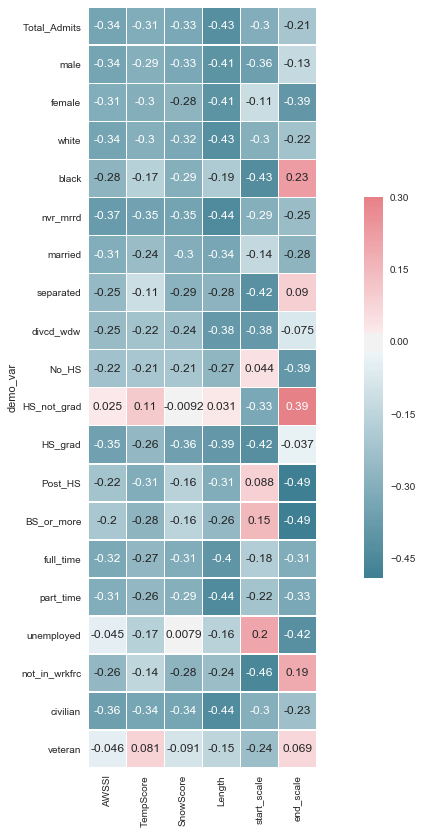

In [40]:
# Make a heatmap of all target subgroups and features

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
f, ax = plt.subplots(figsize=(17, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(dfm, annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
plt.show()

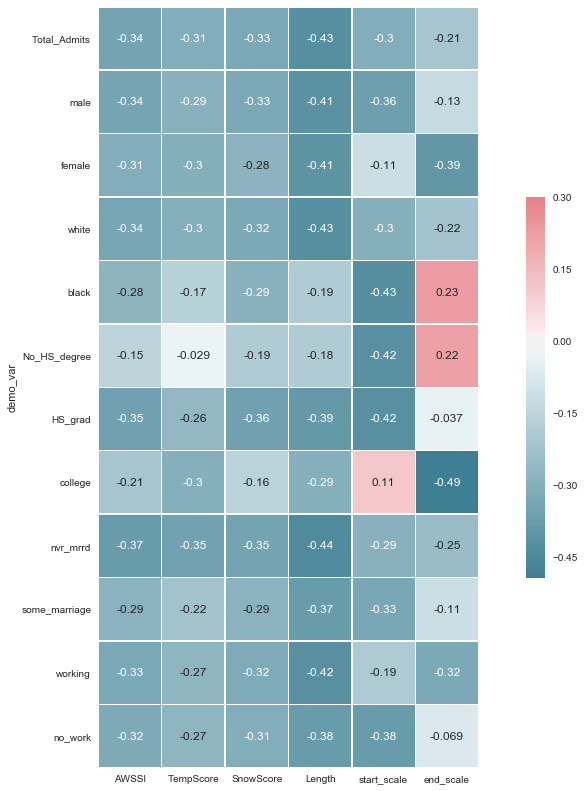

In [41]:
# Make a heatmap for consolidated variable correlation matrix

sns.set(style="white")
f, ax = plt.subplots(figsize=(17, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(dfx, annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
plt.show()

In [45]:
# Make a weather correlation matrix

dfp = dfb.drop(['Total_Admits', 'male', 'female', 'white', 'black', 'nvr_mrrd', 'married', 'separated', 'divcd_wdw', 'No_HS', 'HS_not_grad', 'HS_grad', 'Post_HS', 'BS_or_more', 'full_time', 'part_time', 'unemployed', 'not_in_wrkfrc', 'civilian', 'veteran'], axis = 1)
dfq = dfp[['AWSSI', 'TempScore', 'SnowScore', 'Length', 'start_scale', 'end_scale']]
dfq.head()



,AWSSI,TempScore,SnowScore,Length,start_scale,end_scale
0,440,335,105,159,40,118
1,788,364,424,164,36,127
2,1052,426,626,127,27,99
3,369,279,90,134,28,105
4,1090,400,690,153,38,114


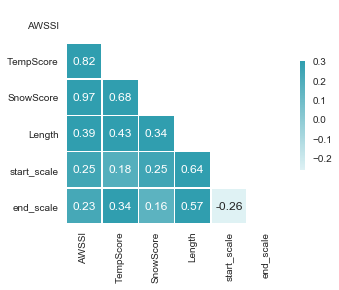

In [46]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = dfq.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure

cmap = sns.light_palette((210, 90, 60), as_cmap=True, input="husl")
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
plt.show()



In [ ]:
"C:/Users/rmbrm/Documents/DS ED/2018/Spring/Cap1/Git/correlations"